In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')


In [12]:
df = pd.read_csv("../data/raw/Credit card transactions - India - Simple.csv")


df = df.drop(columns=['index'])
df.columns = df.columns.str.lower().str.replace(' ', '_')
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%y')
df = df.sort_values('date')


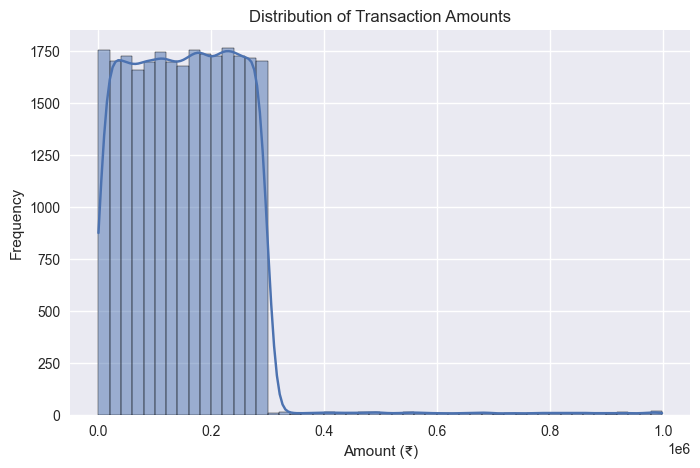

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(df['amount'], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount (₹)")
plt.ylabel("Frequency")
plt.show()


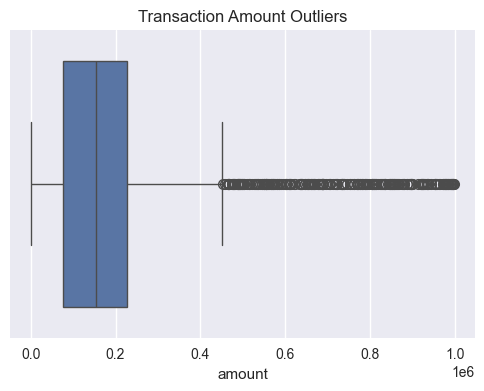

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['amount'])
plt.title("Transaction Amount Outliers")
plt.show()


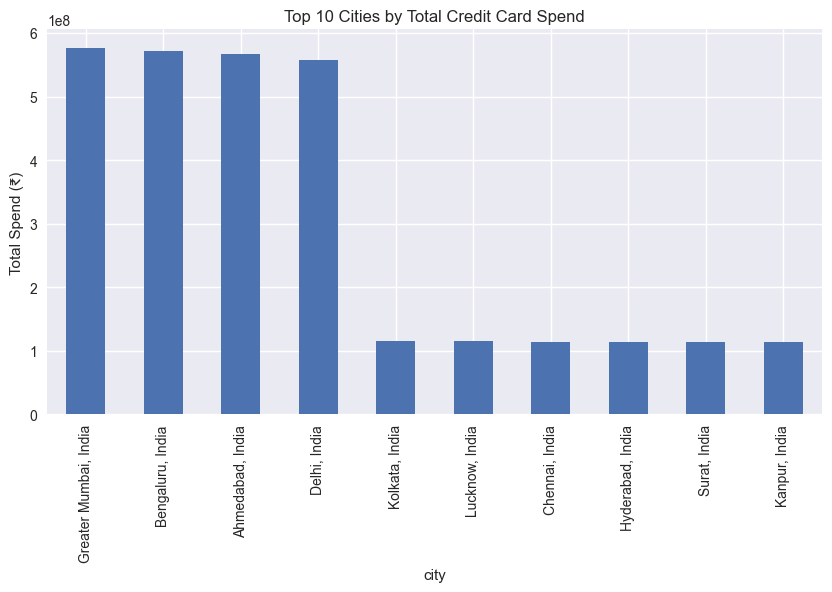

In [15]:
city_spend = df.groupby('city')['amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
city_spend.plot(kind='bar')
plt.title("Top 10 Cities by Total Credit Card Spend")
plt.ylabel("Total Spend (₹)")
plt.show()


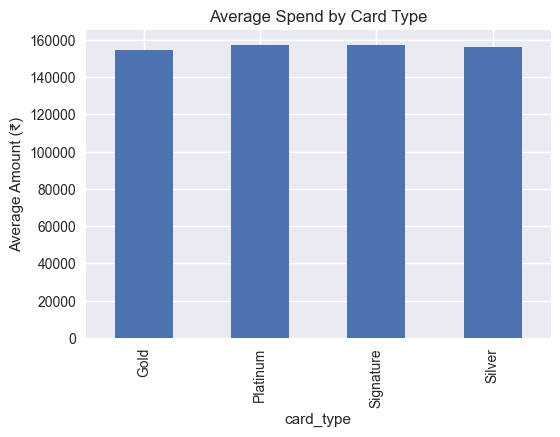

In [16]:
card_avg = df.groupby('card_type')['amount'].mean()

plt.figure(figsize=(6,4))
card_avg.plot(kind='bar')
plt.title("Average Spend by Card Type")
plt.ylabel("Average Amount (₹)")
plt.show()


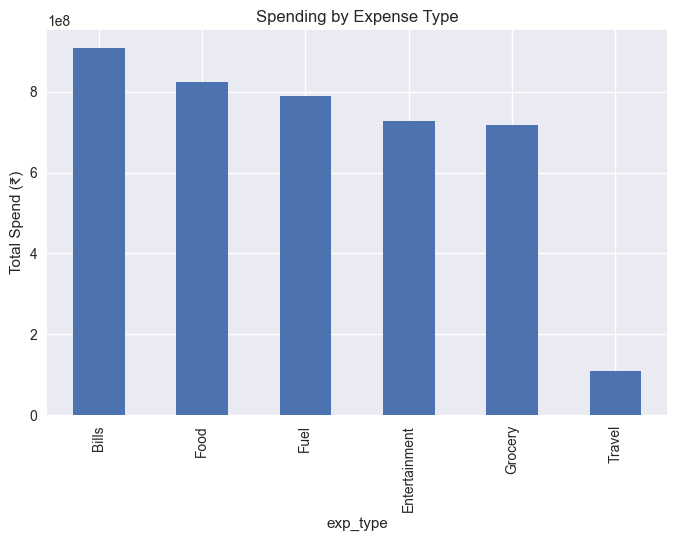

In [17]:
exp_spend = df.groupby('exp_type')['amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
exp_spend.plot(kind='bar')
plt.title("Spending by Expense Type")
plt.ylabel("Total Spend (₹)")
plt.show()


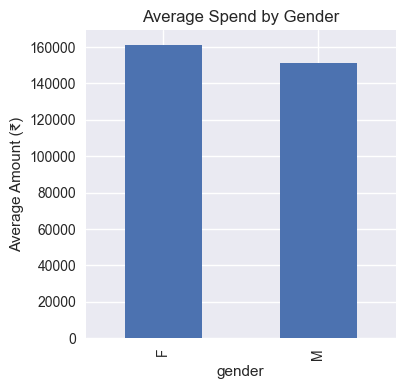

In [18]:
gender_avg = df.groupby('gender')['amount'].mean()

plt.figure(figsize=(4,4))
gender_avg.plot(kind='bar')
plt.title("Average Spend by Gender")
plt.ylabel("Average Amount (₹)")
plt.show()


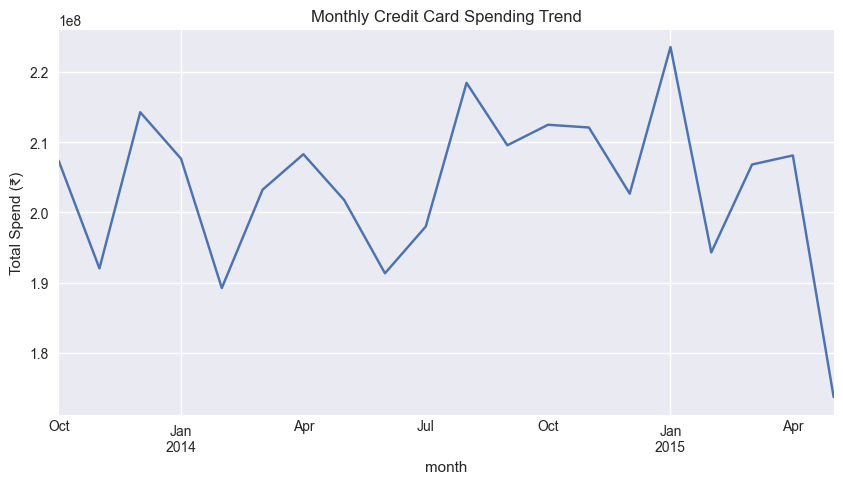

In [19]:
df['month'] = df['date'].dt.to_period('M')

monthly_spend = df.groupby('month')['amount'].sum()

plt.figure(figsize=(10,5))
monthly_spend.plot()
plt.title("Monthly Credit Card Spending Trend")
plt.ylabel("Total Spend (₹)")
plt.show()


In [20]:
df['customer_id'] = (
    df['city'] + "_" +
    df['card_type'] + "_" +
    df['gender']
)


In [21]:
df[['customer_id']].head()


,customer_id
15464,"Lakshmeshwar, India_Silver_F"
9427,"Bengaluru, India_Gold_F"
9418,"Ahmedabad, India_Silver_M"
9244,"Delhi, India_Silver_M"
1521,"Delhi, India_Gold_M"


In [22]:
customer_df = df.groupby('customer_id').agg(
    total_spend=('amount', 'sum'),
    avg_spend=('amount', 'mean'),
    transaction_count=('amount', 'count'),
    first_transaction=('date', 'min'),
    last_transaction=('date', 'max')
).reset_index()


In [23]:
latest_date = df['date'].max()

customer_df['recency_days'] = (
    latest_date - customer_df['last_transaction']
).dt.days


In [24]:
customer_df.head()
customer_df.shape


(4233, 7)

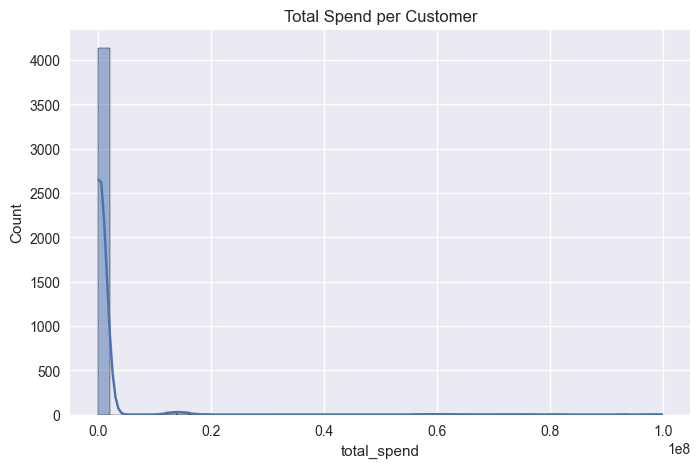

In [25]:
plt.figure(figsize=(8,5))
sns.histplot(customer_df['total_spend'], bins=50, kde=True)
plt.title("Total Spend per Customer")
plt.show()


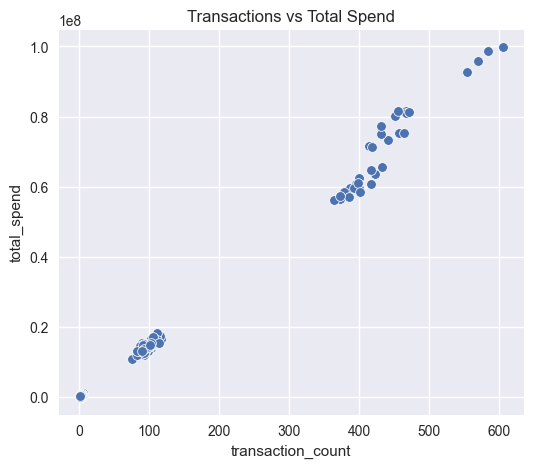

In [26]:
plt.figure(figsize=(6,5))
sns.scatterplot(
    x=customer_df['transaction_count'],
    y=customer_df['total_spend']
)
plt.title("Transactions vs Total Spend")
plt.show()
